In [1]:
from typing import List
from time import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2
from random import randint


# Лабораторная работа №4

## Вариант 12.

### 1. Генераторы.

In [2]:
def linear(size: int, range_modifier: int, seed_modifier: int, r = int((time() - int(time())) * 100000)) -> List[int]:
    """
    Генератор псевдослучайных чисел на основе линейного конгруэнтного метода.
    range_modifier: Диапазон генерации.
    size: Объём генерируемой выборки.
    r: Зерно генератора
    result: Сгенерированная выборка из чисел.
    """
    result = []
    r += seed_modifier 
    m = 2**48
    k = 25214903917
    b = 11
    for _ in range(size):
        r = (k * r + b) % m % range_modifier
        result.append(r)
    return result
    
def simple_generator(size: int, range_modifier: int, seed_modifier: int) -> List[int]:
    """
    Мой собственный генератор псевдослучайных чисел реализованный с помощью метода time()
    range_modifier: Диапазон генерации.
    size: Объём генерируемой выборки.
    result: Сгенерированная выборка из чисел.
    """
    result = []
    seed = int((time() - int(time())) * (1 - (time() - int(time()))) * 51263) % range_modifier + seed_modifier
    for _ in range(size):
        seed = (seed * int((time() - int(time())) * (1 - (time() - int(time()))) * 51263)) % range_modifier
        result.append(seed)
        
    return result

### 2. Вспомогательные функции нахождения выборочных характеристик.

In [3]:

def mean(sample: List[int]) -> float:
    """
    Вычисление выборочного среднего.
    sample: Выборка из чисел.
    return: Выборочное среднее.
    """
    return sum(sample) / len(sample)


def deviation(sample: List[int]) -> float:
    """
    Вычисление выборочного стандартного отклонения.
    sample: Выборка из чисел.
    return: Выборочное стандартное отклонение.
    """
    m = mean(sample)
    return (sum((element-m) ** 2 for element in sample) / len(sample)) ** (1/2)


def cv(sample: List[int]) -> float:
    """
    Вычисление выборочного коэффициента вариации.
    sample: Выборка из чисел.
    return: Выборочный коэффициент вариации.
    """
    return deviation(sample) / mean(sample)

In [4]:
def pearson(sample: List[int]) -> None:
    """
    Проверка выборки на равномерность и случайность с помощью критерия хи-квадрат Пирсона.
    sample: Выборка из чисел для проверки.
    """
    n = len(sample)                             # Объём выборки
    k = 1 + int(np.log2(n))                     # Количество интервалов (по формуле Стёрджеса)
    p = 1 / k                                   # Вероятность попадания элемента в интервал
    borders = np.linspace(0, 10000.01, k+1)     # Границы интервалов

    # Частоты попадания выборочных данных в соответствующие интервалы
    nu = np.zeros(k)
    for element in sample:
        for i in range(k):
            if borders[i] <= element < borders[i+1]:
                nu[i] += 1
                break

    # Статистика, характеризующая отклонение выборочных данных
    # от соответствующих гипотетических значений
    stat = sum(nu[i]**2 / p for i in range(k)) / n - n

    if stat < chi2.ppf(.1, k-1):
        print('выборка недостаточно случайна')
    elif stat > chi2.ppf(.9, k-1):
        print('выборка недостаточно равномерна')
    else:
        for quantile in np.arange(.1, .91, .01):
            if chi2.ppf(quantile, k-1) >= stat:
                break
        print('выборка равномерна и случайна с вероятностью', '%.2f' % quantile)

### 3. Создание выборок

In [5]:
range_ = 10000
size = 100
n = 10

linear_samples = [linear(size, range_, i) for i in range(n)]
simple_samples = [simple_generator(size, range_, i) for i in range(n)]

 ### 4. Вычисление выборочного среднего, стандартного отклонения и коэффицентов вариации.         Проверка на однородность.


In [6]:
# Вычисляем теоретические значения характеристик
theoretical_mean = range_ / 2
theoretical_deviation = (((range_+1)**2 - 1) / 12) ** (1/2)
theoretical_cv = theoretical_deviation / theoretical_mean

# Вычисляем выборочные средние
linear_means = [mean(sample) for sample in linear_samples]
simple_means = [mean(sample) for sample in simple_samples]

# Вычисляем выборочные стандартные отклонения
linear_deviations = [deviation(sample) for sample in linear_samples]
simple_deviations = [deviation(sample) for sample in simple_samples]

# Вычисляем выборочные коэффициенты вариации
linear_cvs = [cv(sample) for sample in linear_samples]
simple_cvs = [cv(sample) for sample in simple_samples]



In [7]:
print('\nТеоретические значения характеристик:')
print(' Математическое ожидание:', '%.2f' % theoretical_mean, )
print(' Стандартное отклонение:', '%.2f' % theoretical_deviation)
print(' Коэффициент вариации:', '%.2f' % theoretical_cv)

print('\nЛинейный конгруэнтный метод:')
print(' Выборочные средние:')
print(('  {:>9.2f}'*n).format(*linear_means))
print(' Выборочные стандартные отклонения:')
print(('  {:>9.2f}'*n).format(*linear_deviations))
print(' Выборочные коэффициенты вариации:')
print(('  {:>9.2f}'*n).format(*linear_cvs))
print(f' {len([cv for cv in linear_cvs if cv < theoretical_cv])} из {n} выборок однородны')

print('\nСамодельный метод:')
print(' Выборочные средние:')
print(('  {:>9.2f}'*n).format(*simple_means))
print(' Выборочные стандартные отклонения:')
print(('  {:>9.2f}'*n).format(*simple_deviations))
print(' Выборочные коэффициенты вариации:')
print(('  {:>9.2f}'*n).format(*simple_cvs))
print(f' {len([cv for cv in simple_cvs if cv < theoretical_cv])} из {n} выборок однородны')



Теоретические значения характеристик:
 Математическое ожидание: 5000.00
 Стандартное отклонение: 2887.04
 Коэффициент вариации: 0.58

Линейный конгруэнтный метод:
 Выборочные средние:
    5586.50    5321.50    5056.50    5091.50    5626.50    5261.50    4896.50    4431.50    4666.50    4901.50
 Выборочные стандартные отклонения:
    2863.67    2827.71    2890.37    3037.77    2875.15    2736.34    2903.76    2837.38    2855.92    2541.03
 Выборочные коэффициенты вариации:
       0.51       0.53       0.57       0.60       0.51       0.52       0.59       0.64       0.61       0.52
 6 из 10 выборок однородны

Самодельный метод:
 Выборочные средние:
    5094.96    5000.00    5330.00    5060.00    5490.00    4720.00    5050.00    5080.00    5010.00    5001.12
 Выборочные стандартные отклонения:
    2953.07    2887.84    2681.01    2977.65    2806.83    2794.15    2886.18    3004.64    2838.56    2944.15
 Выборочные коэффициенты вариации:
       0.58       0.58       0.50       0.59      

### 5. Проверка на равномерность распределения и случайность с помощью Хи-квадрат

In [8]:
print('\n\nЛинейный конгруэнтный метод:')
for i, sample in enumerate(linear_samples):
    print(f' {i}-я ', end='')
    pearson(sample)

print('\nСамодельный метод:')
for i, sample in enumerate(simple_samples):
    print(f' {i}-я ', end='')
    pearson(sample)



Линейный конгруэнтный метод:
 0-я выборка равномерна и случайна с вероятностью 0.69
 1-я выборка равномерна и случайна с вероятностью 0.50
 2-я выборка равномерна и случайна с вероятностью 0.17
 3-я выборка равномерна и случайна с вероятностью 0.15
 4-я выборка недостаточно равномерна
 5-я выборка равномерна и случайна с вероятностью 0.44
 6-я выборка равномерна и случайна с вероятностью 0.58
 7-я выборка равномерна и случайна с вероятностью 0.51
 8-я выборка равномерна и случайна с вероятностью 0.90
 9-я выборка недостаточно равномерна

Самодельный метод:
 0-я выборка недостаточно случайна
 1-я выборка недостаточно случайна
 2-я выборка равномерна и случайна с вероятностью 0.42
 3-я выборка равномерна и случайна с вероятностью 0.12
 4-я выборка равномерна и случайна с вероятностью 0.71
 5-я выборка равномерна и случайна с вероятностью 0.37
 6-я выборка недостаточно случайна
 7-я выборка равномерна и случайна с вероятностью 0.31
 8-я выборка равномерна и случайна с вероятностью 0.15


### 6. Сравнение генераторов по скорости

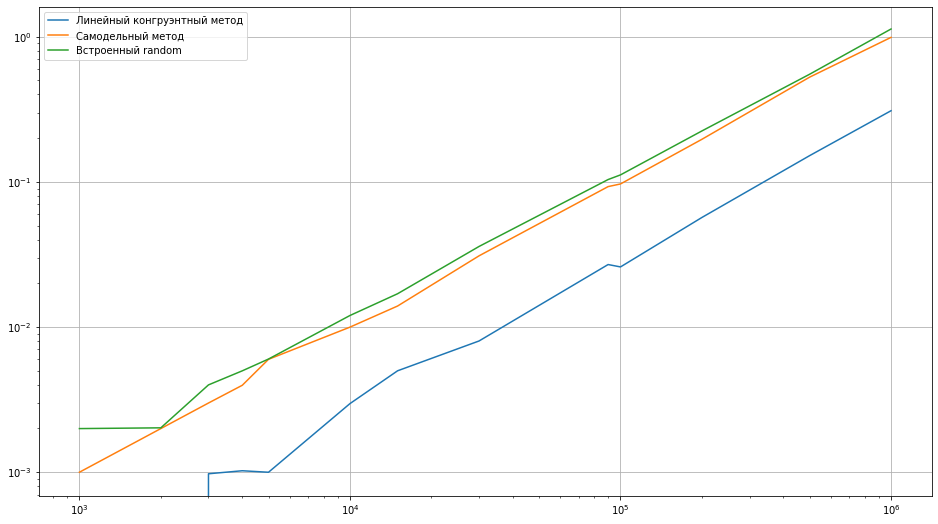

In [9]:

def Timer(method, size_):
    sample = []
    start_time = time()
    if method == "linear":
        linear(size_, range_, 0)
    if method == "simple":
        simple_generator(size_, range_, 0)
    if method == "python":
        for _ in range(size_):
            sample.append(randint(0, size_))
        
    result_time = time() - start_time
    return result_time

sizes = [1000,2000,3000,4000,5000,10000,15000,30000,90000,100000,200000,500000,1000000]
timer_1 = []
timer_2 = []
timer_3 = []

for i in sizes:
    timer_1.append(Timer("linear", i))
    timer_2.append(Timer("simple", i))
    timer_3.append(Timer("python", i))


plt.figure(figsize=(16, 9))
plt.grid()
plt.loglog(sizes, timer_1, label='Линейный конгруэнтный метод')
plt.loglog(sizes, timer_2, label='Самодельный метод')
plt.loglog(sizes, timer_3, label='Встроенный random')
plt.legend()
plt.show()